# 作業三範例

### 1.<br>自定義Fey’s function:$$r=e^{cos⁡\theta}-2cos{(⁡4\theta)}+sin^5⁡{(\theta/12)}$$並作出 $0\leq\theta\leq24\pi$，切為10000點，轉換到直角座標的圖。請標上座標標示，並限制橫軸於[-3, 4]間，縱軸於[-4, 4]之間。<br><br>極座標至直角座標轉換:<br>$x=rcos\theta$<br>$y=rsin⁡\theta$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fey(theta): # 定義 fey's function
    return np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + (np.sin(theta/12.)) ** 5.

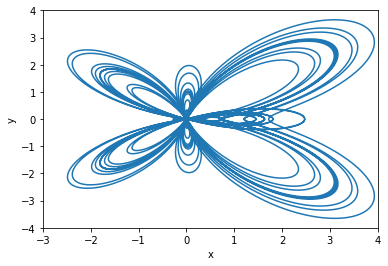

In [3]:
theta = np.linspace(0, 24*np.pi, 10000) # 建置輸入的 theta
r = fey(theta) # r = fey(theta)

x = r * np.cos(theta) # 座標轉換
y = r * np.sin(theta)

plt.plot(x, y) # 作圖
plt.xlabel("x") #座標標示
plt.ylabel("y")
plt.xlim(-3, 4) #限制座標上下限
plt.ylim(-4, 4)
plt.show() #顯示

### 2.<br>下載homework.npz將其中名為”exponential_of”的陣列用imshow作圖。作圖完後，各項乘上30後取對數，新陣列存至”UWU.npz”，陣列命名為”original”，將此陣列用也用imshow顯示出來。



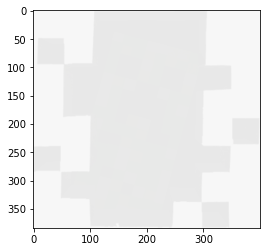

In [4]:
file = np.load("homework.npz") # 載入
Exp = file['exponential']
file.close()
plt.imshow(Exp) # 顯示
plt.show()

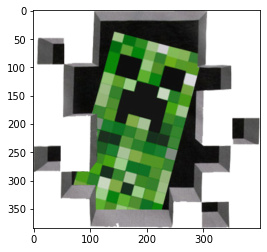

In [5]:
original = np.log(Exp*30) # 運算
np.savez("UWU.npz", original=original) # 儲存
plt.imshow(original) #作圖
plt.show()

### 3.<br>寫程式利用高斯消去法解N變數聯立方程式

In [6]:
def gauss_elim(A, b): # 輸入 A 矩陣，b 向量
    n = len(A) # 變數數量
    A = np.array(A, dtype=float) # 卻認為 ndarray
    b = np.array(b, dtype=float).reshape(-1, 1) # 卻認為 ndarray，且是直的
    A = np.append(A, b, axis=1) # 合成擴增矩陣
    for i in range(n):
        for j in range(i + 1, n): # 先將其進行排列，使以後不會有除以 0 的問題
            if abs(A[i, i]) < abs(A[j, i]):
                temp = np.copy(A[i, :])
                A[i, :], A[j, :] = A[j, :], temp
                break
                
        A[i, :] /= A[i, i]
        for j in range(i + 1, n): # 高斯消去法
            A[j, :] -= A[j, i]*A[i, :]
    for i in range(n - 1, 0, -1): # 往回消成單位矩陣
        for j in range(i - 1, -1, -1):
            A[j, :] -= A[j, i]*A[i, :]
            
    return np.array([rows[n] for rows in A]) # 回傳最後一行

In [9]:
A = [[1, 2, 3, 4], [-6, -7, 8, 9],[11, 12, -13, -14],[-16, 17, 18, 19]] # 測試
b = [5, -10, 15, -20]

print(gauss_elim(A, b))

[ 5.00000000e+00 -7.10542736e-15  1.60000000e+01 -1.20000000e+01]
